# Perceptron Vs MLP

In this notebook, we'll compare the performance of a perceptron and MLP on a non-linear classification task. We can visually see how both the models perform in this challenge.

In [1]:
import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.Session(config=config)

In this example we generate 500 samples. This random generation of points is done using random function from np module

In [3]:
# functioning for generating toy 2D data
import numpy as np # Numpy library is used to work with array. Example: create or modify an array.
def gen_data(n=500):
    x = np.random.randn(n, 2)
    y_ = np.product(x, axis=1) > 0
    y = np.array(y_, dtype=np.int8)
    return(x, y)

In [4]:
# functioning for generating toy 2D data
import numpy as np # Numpy library is used to work with array. Example: create or modify an array.
def gen_data(n=20):
    x = np.random.randn(n, 2)
    y_ = np.product(x, axis=1) > 0
    y = np.array(y_, dtype=np.int8)
    return(x, y)

In [2]:
x, y = gen_data()

In [3]:
x

array([[-1.77148246e-01, -2.90014605e+00],
       [-1.17447048e+00,  1.22394646e+00],
       [ 6.16946211e-01, -6.94173210e-01],
       [-1.59548740e+00, -1.32212010e+00],
       [-1.01472373e+00, -3.56355912e-01],
       [ 6.64797141e-01, -4.23637817e-01],
       [-5.25139545e-01,  5.09017632e-01],
       [ 4.57961496e-01,  9.77492742e-01],
       [-2.19994125e-01,  1.56601687e+00],
       [-9.51121383e-02,  4.15916797e-01],
       [ 1.21301237e+00, -6.52270230e-01],
       [-1.27287926e+00, -9.22820095e-01],
       [-4.40614661e-01, -3.86909372e-01],
       [-1.03889627e+00,  7.25297318e-01],
       [ 1.82443311e+00,  2.72908304e-01],
       [ 6.85167734e-01, -1.60718767e+00],
       [ 9.83325200e-01,  2.00393867e+00],
       [-2.23881512e+00,  1.36829519e-01],
       [ 4.60912806e-01,  2.42488105e-03],
       [ 1.11252623e+00, -1.48991247e-01],
       [-4.27677672e-01,  1.46934337e+00],
       [ 8.09105380e-01, -1.34042119e-02],
       [ 9.88669868e-01,  1.18445219e-01],
       [-7.

In [7]:
y

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0],
      dtype=int8)

In [3]:
x = np.random.randn(10, 2)
print(x)

[[ 0.98830408  0.23953401]
 [ 0.11230587 -0.92191861]
 [ 1.46570303 -1.97746836]
 [-0.89818296  0.51547403]
 [ 0.20881293 -0.22274066]
 [-1.86963837  2.05868004]
 [-1.98147125 -0.80572653]
 [-1.61278394  0.34796528]
 [-0.54548546  0.41784228]
 [ 1.22065803  1.2424572 ]]


From the definition of gen__data, x is now an array of dimensions 500 X 2 (generated using randn function). Then we do a product of these two colums and we obtain y_ which has 500 values. If this product is greater than 0 then y is 1 else the value is 0.

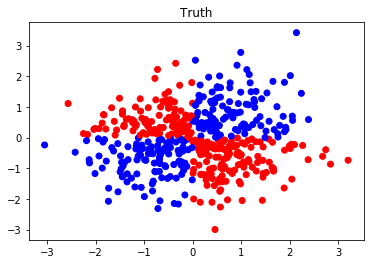

In [4]:
# pyplot is a visualization module in matplotlib.
%matplotlib inline
import matplotlib.pyplot as plt

# Generating random samples of two different classes
x_train, y_train = gen_data()

plt.scatter(x_train[:,0], x_train[:,1], color=[['red', 'blue'][x] 
                                               for x in y_train]) 
#Generating a plot with these 500 points and the 
#red color corresponds to 0 and blue to 1
plt.title('Truth')
plt.show()

Display the random generated points and y

In [10]:
print(x_train[:5])

[[-0.65131163 -1.03708618]
 [-1.07700833 -0.54282497]
 [-1.11298615 -0.44666384]
 [ 1.05462074  0.01885108]
 [ 0.54801912  1.09587236]]


In [11]:
print(y_train[:5])

[1 1 1 1 1]


In [5]:
# keras is a platform for building and training neural networks. 
# Sequential is a container which stores the layers in order. 
# Think of it as a train engine to which you can keep adding train cars. train car in our context will be a layer.
# 'Dense' is a fully connected layer feedforward layer.

import keras
from keras.layers import Dense
from keras.models import Sequential

Using TensorFlow backend.


In [14]:
# Building a perceptron model
model = Sequential()
model.add(Dense(1, input_shape=(2,), activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


Before training a model, you need to configure the learning process, which is done via the compile method. It receives three arguments

In [1]:
model.compile(optimizer='Adam',
      loss='binary_crossentropy',
      metrics=['accuracy'])

NameError: name 'model' is not defined

Trains the model for a given number of epochs (iterations on a dataset).

In [17]:
# Training a perceptron model on the 2D data
model.fit(x_train, y_train, epochs=20)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
500/500 [==============================] - 2s 4ms/step - loss: 0.8995 - acc: 0.5180
Epoch 2/20
500/500 [==============================] - 0s 202us/step - loss: 0.8885 - acc: 0.5180
Epoch 3/20
500/500 [==============================] - 0s 521us/step - loss: 0.8781 - acc: 0.5180 0s - loss: 0.8938 - acc: 0.5
Epoch 4/20
500/500 [==============================] - 0s 216us/step - loss: 0.8679 - acc: 0.5180
Epoch 5/20
500/500 [==============================] - 0s 202us/step - loss: 0.8582 - acc: 0.5180
Epoch 6/20
500/500 [==============================] - 0s 184us/step - loss: 0.8487 - acc: 0.5180
Epoch 7/20
500/500 [==============================] - 0s 196us/step - loss: 0.8398 - acc: 0.5180
Epoch 8/20
500/500 [==============================] - 0s 195us/step - loss: 0.8313 - acc: 0.5180
Epoch 9/20
500/500 [==============================] - 0s 240us/step - loss: 0.8233 - acc: 0.5160
Epoch 10/20
500/500 [==============================]

In [14]:
# Generating test data
x_test, y_test = gen_data(1000)

# Predicting the class label for the test data
plt.rcParams['figure.figsize'] = 8, 4
preds = model.predict_classes(x_test).reshape(-1,).astype(np.int8)

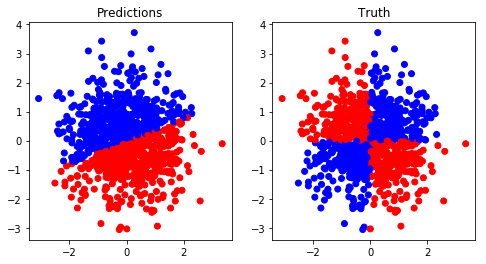

In [15]:
# Ploting the predictions of the perceptron model against ground truth

plt.subplot(1,2,1)
plt.scatter(x_test[:,0], x_test[:,1], color=[['red', 'blue'][x] for x in preds])
plt.title('Predictions')
plt.subplot(1,2,2)
plt.scatter(x_test[:,0], x_test[:,1], color=[['red', 'blue'][x] for x in y_test])
plt.title('Truth')
plt.show()

In [6]:
# Building an MLP model with single hidden layer
model3 = Sequential()
model3.add(Dense(8, input_shape=(2,), activation='sigmoid'))
model3.add(Dense(1, activation='sigmoid'))
model3.compile(optimizer='Adam',
      loss='binary_crossentropy',
      metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 24        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


In [12]:
?model.fit

Object `model.fit` not found.


In [8]:
# Training the MLP on the 2D data
model3.fit(x_train, y_train, epochs=500)

Epoch 1/500
500/500 [==============================] - 0s 82us/step - loss: 0.5695 - acc: 0.7040
Epoch 2/500
500/500 [==============================] - 0s 94us/step - loss: 0.5684 - acc: 0.7180
Epoch 3/500
500/500 [==============================] - 0s 90us/step - loss: 0.5672 - acc: 0.7180
Epoch 4/500
500/500 [==============================] - 0s 274us/step - loss: 0.5661 - acc: 0.7240
Epoch 5/500
500/500 [==============================] - 0s 359us/step - loss: 0.5649 - acc: 0.7220
Epoch 6/500
500/500 [==============================] - 0s 170us/step - loss: 0.5637 - acc: 0.7260
Epoch 7/500
500/500 [==============================] - 0s 158us/step - loss: 0.5626 - acc: 0.7320
Epoch 8/500
500/500 [==============================] - 0s 204us/step - loss: 0.5614 - acc: 0.7380
Epoch 9/500
500/500 [==============================] - 0s 200us/step - loss: 0.5602 - acc: 0.7400
Epoch 10/500
500/500 [==============================] - 0s 124us/step - loss: 0.5591 - acc: 0.7440
Epoch 11/500
500/500 [

500/500 [==============================] - 0s 102us/step - loss: 0.4627 - acc: 0.8960
Epoch 84/500
500/500 [==============================] - 0s 160us/step - loss: 0.4613 - acc: 0.8980
Epoch 85/500
500/500 [==============================] - 0s 190us/step - loss: 0.4599 - acc: 0.8980
Epoch 86/500
500/500 [==============================] - 0s 112us/step - loss: 0.4586 - acc: 0.9020
Epoch 87/500
500/500 [==============================] - 0s 146us/step - loss: 0.4572 - acc: 0.9040
Epoch 88/500
500/500 [==============================] - 0s 98us/step - loss: 0.4560 - acc: 0.9040
Epoch 89/500
500/500 [==============================] - 0s 126us/step - loss: 0.4546 - acc: 0.9060
Epoch 90/500
500/500 [==============================] - 0s 82us/step - loss: 0.4531 - acc: 0.9080
Epoch 91/500
500/500 [==============================] - 0s 100us/step - loss: 0.4517 - acc: 0.9080
Epoch 92/500
500/500 [==============================] - 0s 82us/step - loss: 0.4504 - acc: 0.9100
Epoch 93/500
500/500 [====

500/500 [==============================] - 0s 398us/step - loss: 0.3648 - acc: 0.9380
Epoch 166/500
500/500 [==============================] - 0s 108us/step - loss: 0.3638 - acc: 0.9380
Epoch 167/500
500/500 [==============================] - 0s 450us/step - loss: 0.3628 - acc: 0.9380
Epoch 168/500
500/500 [==============================] - 0s 392us/step - loss: 0.3618 - acc: 0.9360
Epoch 169/500
500/500 [==============================] - 0s 102us/step - loss: 0.3609 - acc: 0.9360
Epoch 170/500
500/500 [==============================] - 0s 136us/step - loss: 0.3600 - acc: 0.9380
Epoch 171/500
500/500 [==============================] - 0s 312us/step - loss: 0.3591 - acc: 0.9380
Epoch 172/500
500/500 [==============================] - 0s 557us/step - loss: 0.3581 - acc: 0.9340
Epoch 173/500
500/500 [==============================] - 0s 546us/step - loss: 0.3572 - acc: 0.9340
Epoch 174/500
500/500 [==============================] - 0s 468us/step - loss: 0.3562 - acc: 0.9340
Epoch 175/500


500/500 [==============================] - 0s 106us/step - loss: 0.3013 - acc: 0.9540
Epoch 246/500
500/500 [==============================] - 0s 168us/step - loss: 0.3007 - acc: 0.9560
Epoch 247/500
500/500 [==============================] - 0s 398us/step - loss: 0.3000 - acc: 0.9560
Epoch 248/500
500/500 [==============================] - 0s 440us/step - loss: 0.2994 - acc: 0.9560
Epoch 249/500
500/500 [==============================] - 0s 314us/step - loss: 0.2987 - acc: 0.9560
Epoch 250/500
500/500 [==============================] - 0s 252us/step - loss: 0.2981 - acc: 0.9560
Epoch 251/500
500/500 [==============================] - 0s 206us/step - loss: 0.2974 - acc: 0.9560
Epoch 252/500
500/500 [==============================] - 0s 270us/step - loss: 0.2969 - acc: 0.9560
Epoch 253/500
500/500 [==============================] - 0s 164us/step - loss: 0.2962 - acc: 0.9560
Epoch 254/500
500/500 [==============================] - 0s 448us/step - loss: 0.2956 - acc: 0.9560 0s - loss: 0.2

500/500 [==============================] - 0s 332us/step - loss: 0.2565 - acc: 0.9480
Epoch 327/500
500/500 [==============================] - 0s 204us/step - loss: 0.2560 - acc: 0.9500
Epoch 328/500
500/500 [==============================] - 0s 136us/step - loss: 0.2555 - acc: 0.9520
Epoch 329/500
500/500 [==============================] - 0s 136us/step - loss: 0.2550 - acc: 0.9500
Epoch 330/500
500/500 [==============================] - ETA: 0s - loss: 0.2540 - acc: 0.9509- ETA: 0s - loss: 0.2688 - acc: 0.93 - 0s 526us/step - loss: 0.2546 - acc: 0.9500
Epoch 331/500
500/500 [==============================] - 0s 419us/step - loss: 0.2541 - acc: 0.9500
Epoch 332/500
500/500 [==============================] - 0s 384us/step - loss: 0.2537 - acc: 0.9520
Epoch 333/500
500/500 [==============================] - 0s 346us/step - loss: 0.2532 - acc: 0.9520 0s - loss: 0.2512 - acc: 0.955
Epoch 334/500
500/500 [==============================] - 0s 246us/step - loss: 0.2527 - acc: 0.9500
Epoch 33

500/500 [==============================] - 0s 342us/step - loss: 0.2252 - acc: 0.9420
Epoch 405/500
500/500 [==============================] - 0s 295us/step - loss: 0.2249 - acc: 0.9420
Epoch 406/500
500/500 [==============================] - 0s 332us/step - loss: 0.2246 - acc: 0.9420
Epoch 407/500
500/500 [==============================] - 0s 332us/step - loss: 0.2242 - acc: 0.9420
Epoch 408/500
500/500 [==============================] - 0s 212us/step - loss: 0.2240 - acc: 0.9420 0s - loss: 0.2118 - acc: 0.953
Epoch 409/500
500/500 [==============================] - 0s 162us/step - loss: 0.2236 - acc: 0.9460
Epoch 410/500
500/500 [==============================] - 0s 244us/step - loss: 0.2233 - acc: 0.9440
Epoch 411/500
500/500 [==============================] - 0s 302us/step - loss: 0.2229 - acc: 0.9440
Epoch 412/500
500/500 [==============================] - 0s 160us/step - loss: 0.2226 - acc: 0.9440
Epoch 413/500
500/500 [==============================] - 0s 210us/step - loss: 0.22

500/500 [==============================] - 0s 154us/step - loss: 0.2025 - acc: 0.9460
Epoch 486/500
500/500 [==============================] - 0s 90us/step - loss: 0.2023 - acc: 0.9460
Epoch 487/500
500/500 [==============================] - 0s 256us/step - loss: 0.2020 - acc: 0.9460
Epoch 488/500
500/500 [==============================] - 0s 204us/step - loss: 0.2018 - acc: 0.9460
Epoch 489/500
500/500 [==============================] - 0s 158us/step - loss: 0.2016 - acc: 0.9460
Epoch 490/500
500/500 [==============================] - 0s 180us/step - loss: 0.2013 - acc: 0.9460
Epoch 491/500
500/500 [==============================] - 0s 102us/step - loss: 0.2012 - acc: 0.9460
Epoch 492/500
500/500 [==============================] - 0s 106us/step - loss: 0.2009 - acc: 0.9460
Epoch 493/500
500/500 [==============================] - 0s 192us/step - loss: 0.2006 - acc: 0.9460
Epoch 494/500
500/500 [==============================] - 0s 220us/step - loss: 0.2004 - acc: 0.9460
Epoch 495/500
5

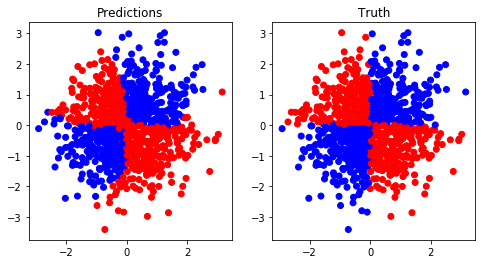

In [9]:
# Generating test data
x_test, y_test = gen_data(1000)

# Predicting labels using the MLP model
plt.rcParams['figure.figsize'] = 8, 4
preds = model3.predict_classes(x_test).reshape(-1,).astype(np.int8)

# Ploting the predictions against the ground truth labels
plt.subplot(1,2,1)
plt.scatter(x_test[:,0], x_test[:,1], color=[['red', 'blue'][x] for x in preds])
plt.title('Predictions')
plt.subplot(1,2,2)
plt.scatter(x_test[:,0], x_test[:,1], color=[['red', 'blue'][x] for x in y_test])
plt.title('Truth')
plt.show()

In [30]:
y = [0,1,0,1,1,2]
[["red", "blue","green"][x] for x in y]

['red', 'blue', 'red', 'blue', 'blue', 'green']

In [8]:
def softmax(X):
    exps = np.exp(X)
    print(exps)
    return exps / np.sum(exps)

In [9]:
softmax([0.1,0.3,0.9])

[ 1.10517092  1.34985881  2.45960311]


array([ 0.22487355,  0.27466117,  0.50046528])

Cross Entropy:
−(ylog(p)+(1−y)log(1−p))


−∑c=1Myo,clog(po,c)

In [41]:
def CrossEntropy(yHat, y):
    if y == 1:
      return -log(yHat)
    else:
      return -log(1 - yHat)

### Tensorflow Playground
http://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.33901&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false